In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"krishnavyas36","key":"2cabc2c9c42b0c4e32ab3ca3a04f5194"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mahmoudima/mma-facial-expression


Dataset URL: https://www.kaggle.com/datasets/mahmoudima/mma-facial-expression
License(s): unknown
 97% 161M/166M [00:03<00:00, 76.0MB/s]
100% 166M/166M [00:03<00:00, 51.2MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("mma-facial-expression.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/mma_facial_expression")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import numpy as np

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from itertools import chain
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

# Define transformations
emotion_trans = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),          # Convert images to tensors
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

# Load train and test datasets
train_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/train', transform=emotion_trans)
test_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/test', transform=emotion_trans)



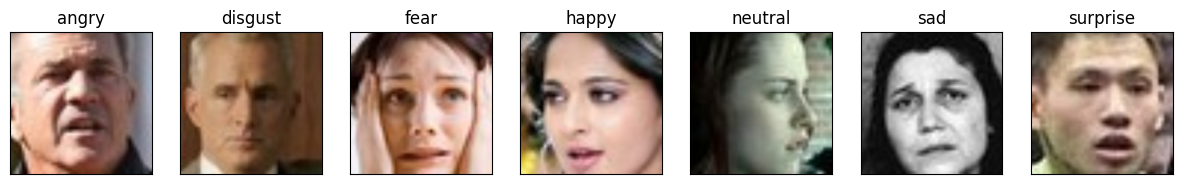

In [ ]:
import matplotlib.pyplot as plt

# Define your 7 emotion classes
class_names = train_emotion.classes  # Automatically retrieves class names from the dataset

# Plot images from each class
fig = plt.figure(figsize=(15, 5))
num_classes = len(class_names)
for i in range(num_classes):
    ax = fig.add_subplot(1, num_classes, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    # Find an image for each class and plot it
    img, label = next((img, label) for img, label in test_emotion if label == i)
    img = img.permute(1, 2, 0).numpy()  # Convert image to numpy array
    img = (img - img.min()) / (img.max() - img.min())  # Rescale to [0, 1] for proper visualization
    plt.imshow(img)
plt.show()


In [ ]:
emotion_trans = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.4630, 0.4530, 0.3405], std = [0.2862, 0.2758, 0.2845])
])

In [ ]:
train_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/train', transform=emotion_trans)
test_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/test', transform=emotion_trans)


In [ ]:
from collections import Counter

# Count images in each class for the training set
train_class_counts = Counter([label for _, label in train_emotion.samples])
print("Number of images in each class (Train):")
for class_idx, count in train_class_counts.items():
    print(f"{class_names[class_idx]}: {count}")

# Count images in each class for the testing set
test_class_counts = Counter([label for _, label in test_emotion.samples])
print("\nNumber of images in each class (Test):")
for class_idx, count in test_class_counts.items():
    print(f"{class_names[class_idx]}: {count}")

Number of images in each class (Train):
angry: 6566
disgust: 3231
fear: 4859
happy: 28592
neutral: 29384
sad: 12223
surprise: 8113

Number of images in each class (Test):
angry: 1041
disgust: 655
fear: 691
happy: 5459
neutral: 5858
sad: 2177
surprise: 1475


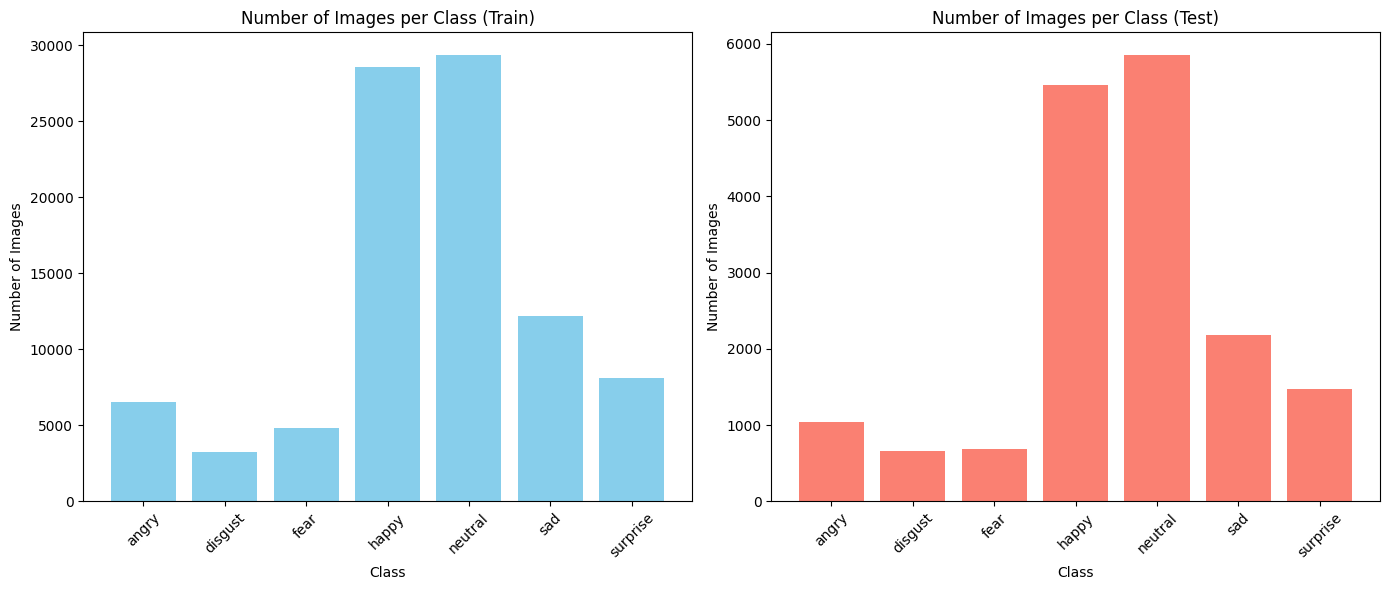

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Count images in each class for the training set
train_class_counts = Counter([label for _, label in train_emotion.samples])
train_counts = [train_class_counts[i] for i in range(len(class_names))]

# Count images in each class for the testing set
test_class_counts = Counter([label for _, label in test_emotion.samples])
test_counts = [test_class_counts[i] for i in range(len(class_names))]

# Plotting the bar graphs
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].bar(class_names, train_counts, color='skyblue')
ax[0].set_title("Number of Images per Class (Train)")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Number of Images")
ax[0].tick_params(axis='x', rotation=45)

ax[1].bar(class_names, test_counts, color='salmon')
ax[1].set_title("Number of Images per Class (Test)")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Number of Images")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate mean and standard deviation
mean = torch.zeros(3)
std = torch.zeros(3)

for img, _ in train_emotion:
    mean += img.mean(dim=(1, 2))  # Compute mean for each channel
    std += img.std(dim=(1, 2))   # Compute std for each channel

mean /= len(train_emotion)
std /= len(train_emotion)

print(f"Mean: {mean}")
print(f"Std: {std}")




Mean: tensor([ 0.2214, -0.0247,  0.2498])
Std: tensor([0.7593, 0.7311, 0.6851])


In [ ]:
import os

base_path = '/content/mma_facial_expression/MMAFEDB'
for root, dirs, files in os.walk(base_path):
    print(f"Root: {root}")
    print(f"Dirs: {dirs}")
    print(f"Files: {len(files)}")
    print("-" * 50)


Root: /content/mma_facial_expression/MMAFEDB
Dirs: ['train', 'test', 'valid']
Files: 0
--------------------------------------------------
Root: /content/mma_facial_expression/MMAFEDB/train
Dirs: ['angry', 'happy', 'fear', 'surprise', 'neutral', 'sad', 'disgust']
Files: 0
--------------------------------------------------
Root: /content/mma_facial_expression/MMAFEDB/train/angry
Dirs: []
Files: 6566
--------------------------------------------------
Root: /content/mma_facial_expression/MMAFEDB/train/happy
Dirs: []
Files: 28592
--------------------------------------------------
Root: /content/mma_facial_expression/MMAFEDB/train/fear
Dirs: []
Files: 4859
--------------------------------------------------
Root: /content/mma_facial_expression/MMAFEDB/train/surprise
Dirs: []
Files: 8113
--------------------------------------------------
Root: /content/mma_facial_expression/MMAFEDB/train/neutral
Dirs: []
Files: 29384
--------------------------------------------------
Root: /content/mma_facial_

In [ ]:
from PIL import Image, UnidentifiedImageError  # Import required modules

# Check for corrupted images
for img_path, _ in train_emotion.samples:
    try:
        with Image.open(img_path) as img:
            img.verify()  # Verify the integrity of the image
    except UnidentifiedImageError:
        print(f"Corrupt image: {img_path}")


In [ ]:
from torch.utils.data import WeightedRandomSampler,DataLoader
import torch

# Calculate class weights
class_counts = Counter(train_emotion.targets)
class_weights = [1.0 / class_counts[i] for i in range(len(train_emotion.classes))]
sample_weights = [class_weights[label] for _, label in train_emotion.samples]

# Create sampler
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

# Use the sampler in DataLoader
train_loader = DataLoader(train_emotion, batch_size=32, sampler=sampler)


Class distribution after sampling:
sad: 13434 samples
fear: 13130 samples
angry: 13133 samples
surprise: 13336 samples
neutral: 13133 samples
disgust: 13388 samples
happy: 13414 samples


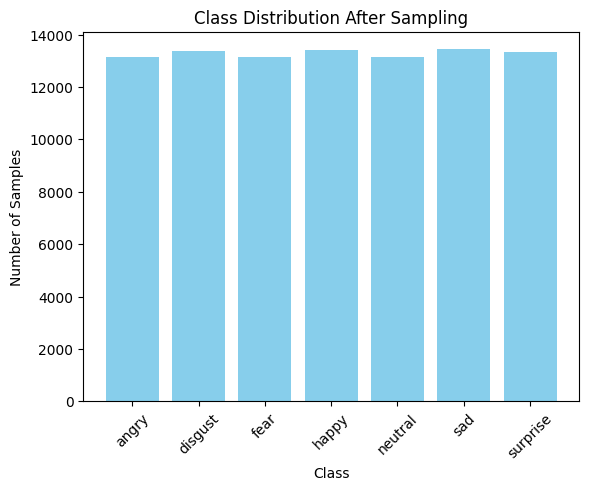

In [ ]:
from collections import Counter

# Generate the sampled dataset indices
sampled_indices = list(sampler)

# Retrieve the labels corresponding to the sampled indices
sampled_labels = [train_emotion.targets[idx] for idx in sampled_indices]

# Count the frequency of each class
sampled_class_counts = Counter(sampled_labels)

# Print the size of each class
print("Class distribution after sampling:")
for class_idx, count in sampled_class_counts.items():
    print(f"{train_emotion.classes[class_idx]}: {count} samples")

# Optional: Visualize the distribution
import matplotlib.pyplot as plt

classes = [train_emotion.classes[idx] for idx in range(len(train_emotion.classes))]
class_sizes = [sampled_class_counts.get(idx, 0) for idx in range(len(train_emotion.classes))]

plt.bar(classes, class_sizes, color='skyblue')
plt.title("Class Distribution After Sampling")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from torchvision import models, transforms
import torch
import numpy as np

# Load pretrained ResNet model for feature extraction
resnet = models.resnet18(pretrained=True)
resnet.fc = torch.nn.Identity()  # Remove the classification layer

# Transformation for feature extraction
feature_trans = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Function to extract features
def extract_features(loader, model):
    features = []
    labels = []
    model.eval()
    with torch.no_grad():
        for inputs, targets in loader:
            inputs = inputs
            outputs = model(inputs)
            features.append(outputs.cpu().numpy())
            labels.append(targets.cpu().numpy())
    return np.vstack(features), np.hstack(labels)

# Prepare DataLoader for feature extraction
train_loader = torch.utils.data.DataLoader(train_emotion, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_emotion, batch_size=64, shuffle=False)

# Extract features and labels
train_features, train_labels = extract_features(train_loader, resnet)
test_features, test_labels = extract_features(test_loader, resnet)

print(f"Train features shape: {train_features.shape}")
print(f"Test features shape: {test_features.shape}")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 124MB/s]


Train features shape: (92968, 512)
Test features shape: (17356, 512)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(train_features, train_labels)

# Predict on test data
test_predictions = classifier.predict(test_features)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(test_labels, test_predictions))
print("\nClassification Report:")
print(classification_report(test_labels, test_predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[ 206    1   49  306  275   97  107]
 [  31    1    6  124  392   69   32]
 [  64    2  109  109  174  117  116]
 [  70    4   53 2557 2423  249  103]
 [ 112    6   46 1014 4216  303  161]
 [  89    3   62  481  968  455  119]
 [  52    0   60  243  529   57  534]]

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.20      0.25      1041
           1       0.06      0.00      0.00       655
           2       0.28      0.16      0.20       691
           3       0.53      0.47      0.50      5459
           4       0.47      0.72      0.57      5858
           5       0.34      0.21      0.26      2177
           6       0.46      0.36      0.40      1475

    accuracy                           0.47     17356
   macro avg       0.35      0.30      0.31     17356
weighted avg       0.44      0.47      0.44     17356



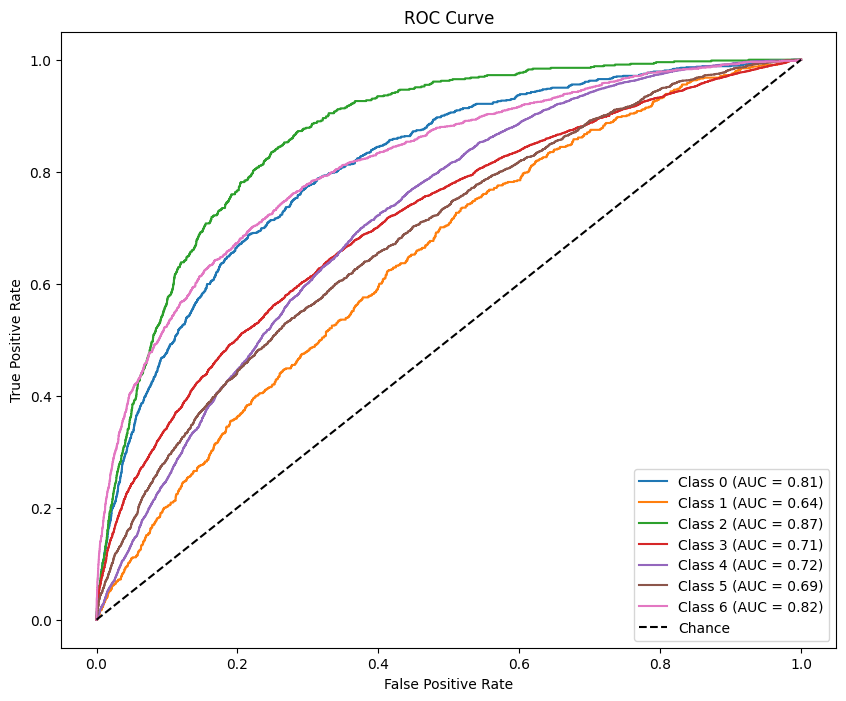

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize labels for multi-class ROC
num_classes = len(set(test_labels))
test_labels_binarized = label_binarize(test_labels, classes=np.arange(num_classes))
test_predictions_proba = classifier.predict_proba(test_features)  # Assuming `classifier` has `predict_proba`

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(test_labels_binarized[:, i], test_predictions_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


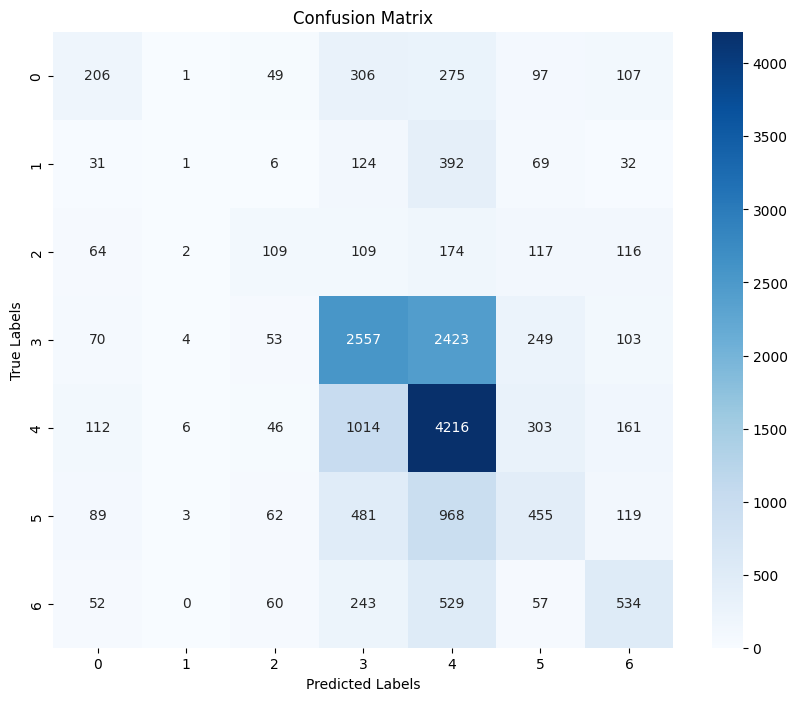

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


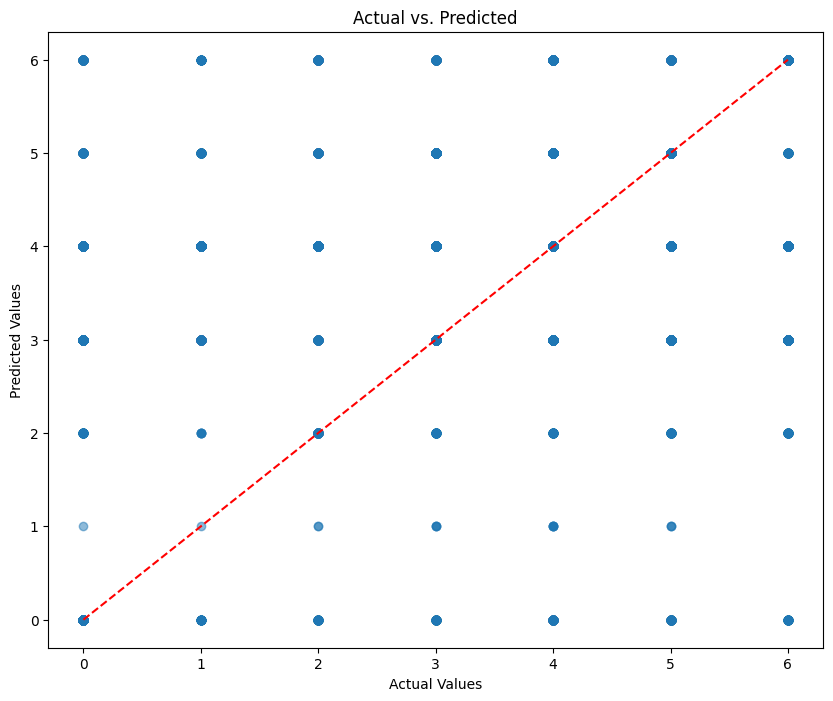

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(test_labels, test_predictions, alpha=0.5)
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], "r--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()


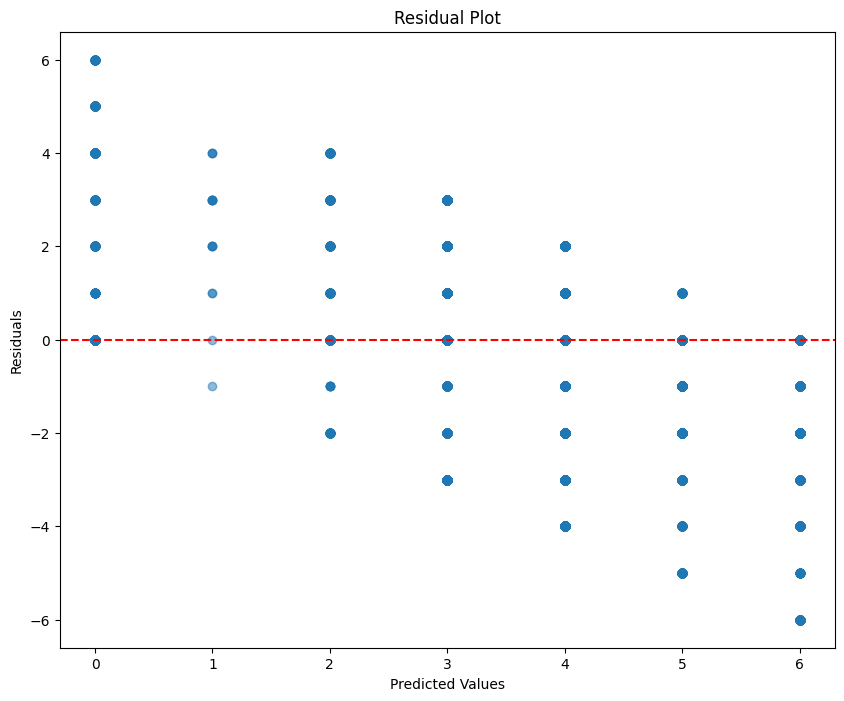

In [ ]:
residuals = test_labels - test_predictions
plt.figure(figsize=(10, 8))
plt.scatter(test_predictions, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  # 100 trees in the forest
rf_classifier.fit(train_features, train_labels)

# Predict on the test data
rf_predictions = rf_classifier.predict(test_features)


In [ ]:
print("Classification Report (Random Forest):")
print(classification_report(test_labels, rf_predictions))


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.61      0.07      0.12      1041
           1       0.84      0.02      0.05       655
           2       0.63      0.12      0.20       691
           3       0.44      0.42      0.43      5459
           4       0.42      0.79      0.55      5858
           5       0.37      0.07      0.12      2177
           6       0.63      0.20      0.30      1475

    accuracy                           0.43     17356
   macro avg       0.56      0.24      0.25     17356
weighted avg       0.47      0.43      0.38     17356



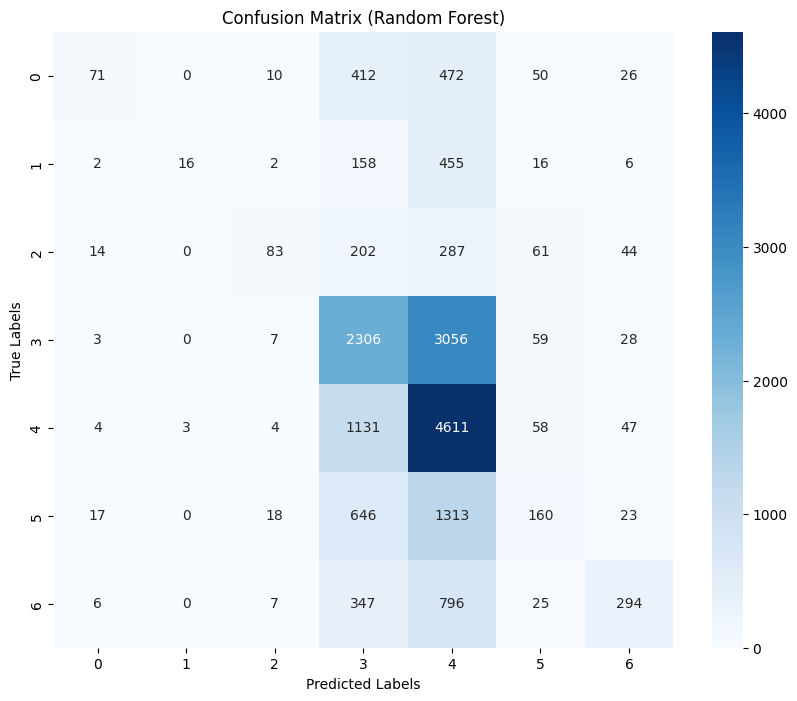

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(test_labels, rf_predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(len(set(test_labels))), yticklabels=np.arange(len(set(test_labels))))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Random Forest)")
plt.show()


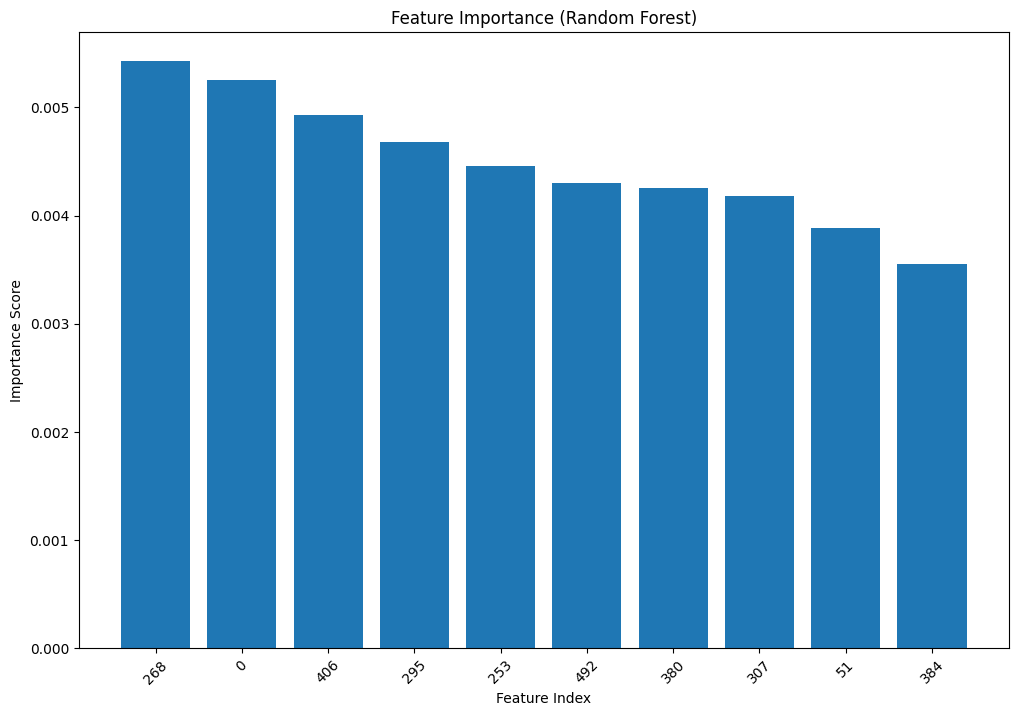

In [ ]:
# Feature Importance
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort features by importance

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), indices[:10], rotation=45)
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=3, scoring="accuracy", verbose=2, n_jobs=-1)
grid_search.fit(train_features, train_labels)

# Best parameters
print("Best parameters:", grid_search.best_params_)
best_rf_classifier = grid_search.best_estimator_

# Predict and evaluate with the best model
best_rf_predictions = best_rf_classifier.predict(test_features)
print("Classification Report (Best RF):")
print(classification_report(test_labels, best_rf_predictions))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
